# Depth findings in Books

## I. Predicting genres using description of books

In this section, we use the tf-idf model built using the movies genres to label books. Categorized books are used for create groups and being able to recommend books based on the movie users profiles. Alternativaly, we could use the same exercise creating users profiles of readers.


## II. Users profiles




## III. Retrieve places and dates to put books in historical contexts

### Importing Data

Importing relevant packages:

In [1]:
import re
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_books_reviews = pd.read_csv('../Data/processed/books/sentiment_patterns_books_reviews.csv', index_col=False)

In [3]:
df_books_reviews.rename(columns = {'Unnamed: 0': 'counter'}, inplace=True)

In [4]:
df_books_reviews.head(2)

,counter,book_id,has_spoiler,rating,review_id,review_sentences,timestamp,user_id,title,description,text_normalized,polarity_textBlob,subjectivity_textBlob,sentiment_scores,sentiment_category
0,0,16981,False,3,a5d2c3628987712d0e05c4f90798eb67,"[[0, 'Recommended by Don Katz.'], [0, 'Avail f...",2017-03-22,8842281e1d1347389f2ab93d60773d4d,Invisible Man,First published in 1952 and immediately hailed...,recommended by don katz avail for free in dece...,0.4000,0.8000,3.0,positive
1,1,16981,False,4,706a8032efbde550167bf0d96c2ab501,"[[0, 'This book was actually good, so long tho...",2015-02-25,2159f55d397e8fbe68d5e03668e7d9d2,Invisible Man,First published in 1952 and immediately hailed...,this book wa actually good so long though haha...,0.4125,0.5125,9.0,positive


In [5]:
df_books = pd.read_csv('../Data/processed/books/books_noDict_year.csv', index_col=False)

In [6]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581450 entries, 0 to 581449
Data columns (total 32 columns):
Unnamed: 0              581450 non-null int64
asin                    41515 non-null object
authors                 581450 non-null object
average_rating          581450 non-null float64
book_id                 581450 non-null int64
country_code            581450 non-null object
description             581450 non-null object
edition_information     68270 non-null object
format                  559346 non-null object
image_url               581450 non-null object
is_ebook                581450 non-null bool
isbn                    413393 non-null object
isbn13                  475271 non-null object
kindle_asin             242123 non-null object
language_code           355032 non-null object
link                    581450 non-null object
num_pages               581450 non-null float64
popular_shelves         581450 non-null object
publication_day         452057 non-null float64

In [7]:
df_books_col = df_books.loc[:, ['book_id', 'title', 'language_code', 
                  'description', 'similar_books', 'average_rating', 'ratings_count',
                  'num_pages', 'text_reviews_count']]

In [8]:
df_books_col.head()

,book_id,title,language_code,description,similar_books,average_rating,ratings_count,num_pages,text_reviews_count
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",eng,Omnibus book club edition containing the Ladie...,"['19997', '828466', '1569323', '425389', '1176...",4.03,140.0,600.0,7.0
1,287141,The Aeneid for Boys and Girls,NaN,"Relates in vigorous prose the tale of Aeneas, ...",[],4.13,46.0,162.0,7.0
2,6066812,All's Fairy in Love and War (Avalon: Web of Ma...,NaN,"To Kara's astonishment, she discovers that a p...","['948696', '439885', '274955', '12978730', '37...",4.22,98.0,216.0,6.0
3,287149,The Devil's Notebook,NaN,"Wisdom, humor, and dark observations by the fo...","['287151', '1104760', '1172822', '440292', '28...",3.81,986.0,147.0,39.0
4,6066814,"Crowner Royal (Crowner John Mystery, #13)",NaN,"London, 1196. At the command of Richard the Li...","['439108', '522621', '116770', '1275927', '620...",3.93,186.0,400.0,15.0


## Language in descriptions

To label the books, we have to ensure that all descriptions are in English, which is the language used to create documents by genre in movies.

In [9]:
print(df_books_col.language_code.unique())

['eng' nan 'ger' 'spa' 'ita' 'tur' 'mon' 'per' 'ara' 'en-US' 'tha' 'lav'
 'jpn' 'pol' 'fre' 'kor' 'fin' 'bul' 'en-GB' 'nl' 'gre' 'slo' 'heb' 'hun'
 'ben' 'por' 'ind' 'scr' 'zho' 'fil' 'rus' 'en-CA' 'lit' 'swe' 'nor' 'msa'
 'rum' 'dan' 'cze' 'slv' 'nno' 'pes' 'hye' 'nob' 'cat' 'vie' 'nep' 'mar'
 'srp' 'guj' 'est' 'ukr' 'kat' 'hin' 'mus' 'tam' 'urd' 'afr' 'en' 'bos'
 'kur' 'pt-BR' 'isl' 'crh' 'kan' 'mul' 'mal' 'fao' 'aze' 'ota' 'mkd'
 'es-MX' 'pra' 'tgl' 'lat' 'grc' 'eus' 'glg' 'sin' 'tel' 'mlt' 'ada' '--'
 'apa' 'udm' 'sqi' 'bel' 'mya' 'dum' 'ori' 'smn' 'amh' 'tut' 'frs' 'arg'
 'ang' 'epo' 'snd' 'vls' 'jav' 'tlh' 'din' 'wel' 'gsw' 'her' 'abk' 'enm'
 'oci' 'ast' 'nld' 'kok' 'tib' 'aus' 'grn' 'nds' 'gla' 'dyu' 'sco' 'che'
 'nqo' 'sun' 'cor' 'run' 'ira' 'asm' 'bug' 'pan' 'vai' 'gmh' 'qaa' 'dua'
 'krl' 'gle' 'inh' 'egy' 'fiu' 'phi' 'mri' 'hat' 'san' 'ava' 'chb' 'peo'
 'iba' 'en-IN' 'tup' 'swa']


In [10]:
df_books_col[df_books_col.language_code == 'ita'].head()

,book_id,title,language_code,description,similar_books,average_rating,ratings_count,num_pages,text_reviews_count
14,18628480,Stoner,ita,Stoner e il racconto della vita di un uomo tra...,"['458275', '1289430', '6553843', '6760818', '7...",4.28,116.0,332.0,19.0
23,9671977,Aristotele e i misteri di Eleusi,ita,"""I misteri di Eleusi"" e il quinto romanzo di A...",[],3.54,22.0,659.0,3.0
32,17373671,L'isola dell'amore proibito,ita,L'acqua cristallina lambisce dolcemente i suoi...,"['7504833', '17229636', '1531433', '17447588',...",4.13,5.0,322.0,1.0
81,15773972,"La regina, l'alchimista e il cardinale",ita,La corte del re Luigi XVI sta per essere travo...,[],3.79,19.0,499.0,3.0
91,10573355,L'assassino di Banconi,ita,"Africa Occidentale, Bamako, capitale del Mali....",[],3.00,6.0,167.0,2.0


In [11]:
df_books_col[df_books_col.language_code == 'spa'].head()

,book_id,title,language_code,description,similar_books,average_rating,ratings_count,num_pages,text_reviews_count
8,2008910,"Buenos días, tristeza",spa,En una hermosa mansion a orillas del Mediterra...,"['1341626', '2781122', '1616343', '1665710', '...",3.62,5.0,184.0,2.0
51,27189830,El Tarot del inconsciente: Abordaje terapéutic...,spa,Entre los muchos metodos existentes para deter...,[],5.00,1.0,202.0,1.0
87,15773978,El secuestro de Robles Martínez,spa,Robles Martinez fue un escritor de mediano pre...,[],3.25,8.0,91.0,1.0
109,25719218,"Viaje a Australia, Nueva Zelanda y Malasia",spa,Tras un recorrido de 72.000 kilometros y seis ...,"['278263', '48130', '414962', '157974', '10756...",3.97,2.0,230.0,1.0
116,1263548,"Anibal, El Orgullo De Cartago",spa,"Comenzando en Espana, donde el padre de Anibal...","['484192', '836850', '49577', '3979407', '4380...",3.87,77.0,580.0,8.0


As we could note, we can't guarantee that the language of descriptions for foreign books is English. Then, we manage only English books. To do that, and perhaps there are other english descriptions in the rest of language codes, we use the following list of english codes:

In [12]:
english_list = ['eng', 'en-US', 'en-GB', 'en-CA', 'en', 'en-IN']

In [13]:
df_books_col_eng = df_books_col[df_books_col.language_code.isin(english_list)]

In [14]:
df_books_col_eng.head(2)

,book_id,title,language_code,description,similar_books,average_rating,ratings_count,num_pages,text_reviews_count
0,7327624,"The Unschooled Wizard (Sun Wolf and Starhawk, ...",eng,Omnibus book club edition containing the Ladie...,"['19997', '828466', '1569323', '425389', '1176...",4.03,140.0,600.0,7.0
7,89378,Dog Heaven,eng,In Newbery Medalist Cynthia Rylant's classic b...,"['834493', '452189', '140185', '1897316', '218...",4.43,1331.0,40.0,193.0


In [15]:
# for idx in df_books_col_eng['similar_books'][0].split(','):
#     idx = idx.replace('[', '').replace(']', '').replace("'",'').replace(" ", '')
#     print(idx)
#     try:
#         print(df_books_col.title[df_books_col.book_id == int(idx)])
#     except:
#         continue

### NLP Preprocessing to extract key words (same to movies in previous section)

In this part, we are using NLP preprocessing pipeline to extract key words from descriptions. We dont' want to repeat the pipeline in duplicates books, then we assert that every id book is unique.

In [16]:
try:
    assert len(df_books_col_eng.books_id) == len(df_books_col_eng.books_id.unique())
except:
    df_books_col_eng.drop_duplicates('book_id', keep='first', inplace=True)

/Users/daniela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Importing the NLP packages to do the preprocessing and to measure the similarity between books and documents by genres

In [17]:
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
import json

In [18]:
"""
from http://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
all credits go to alko and arturomp @ stack overflow.
"""

with open('../Data_wrangling/wordLists/contractionList.txt', 'r') as f:
    cList = json.loads(f.read())
    c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

In [19]:
wpt = nltk.WordPunctTokenizer()
lemmatizer = WordNetLemmatizer()
stopwords_list = nltk.corpus.stopwords.words('english')

def pre_processing(text):
    text = expandContractions(text.lower())
    # Filtering special characters
    text = re.sub(r'[^0-9-a-zA-Z\s]','', text)
    # Tokenization and filtering stop-words
    tokens = wpt.tokenize(text)
    # Filtering stop_words
    tokens_filtered = [word for word in tokens if word.lower() not in stopwords_list]
    # Lemmatization
    words_lem = [lemmatizer.lemmatize(word) for word in tokens_filtered]
    text_norm = ' '.join(words_lem)
    
    return text_norm

Filtering NaN overviews:

In [20]:
df_books_col_eng_copy = df_books_col_eng.copy()
df_books_col_eng_copy.dropna(subset=['description'], inplace=True)
print('size of data = {}'.format(df_books_col_eng.shape[0]), '\nsize of data ignoring NaN in overviews = {}'.format(df_books_col_eng_copy.shape[0]))

size of data = 221605 
size of data ignoring NaN in overviews = 221605


### Part of Speech to delete irrelevant words (same to movies in previous section)


One approach is use our preprocessing NLP steps for filtering irrelevant words, but instead, we could use part of speech and extract only some specific structures of sentences, for instances, verbs, nouns and adjectives.

In [21]:
from nltk.tag import pos_tag

We could go without preprositions `IN` and verbs `VB`, for instances. Using all the movies in the sample and filtering all except nouns `NN`, adjectives `JJ` and cardinal digits `CD`:

In [22]:
def part_of_speech_filtering(text):
    """
    This function filter words after to determine the part of speech of everyone using nltk library. 
    Only nouns, adjectives and numbers are retrieved, listed in post_list.
    """
    pos_list = ['NN', 'VBP', 'NNS', 'NNPS', 'NNP', 'JJ', 'JJR', 'JJS', 'CD']
    # Determining Part Of Speech of every word
    tokens = nltk.word_tokenize(text)
    pos = nltk.pos_tag(tokens)
    # Filtering according to pos_list
    words_pos = [p[0].lower() for p in pos if p[1] in pos_list]
    # Joining the words again to return as text
    text_pos = ' '.join(words_pos)
    
    return text_pos

In this case, we apply these functions to a sample data. Before to do that, we come back to movies and their descriptions.

Importing the dataFrame with description of movies and genres *documents_movies_genres.csv*:

In [23]:
df_documents_movies_genres = pd.read_csv('../Data/processed/documents_movies_genres.csv')

In [24]:
label_genres = list(df_documents_movies_genres.label.values)
label_genres

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Thriller',
 'War',
 'Western']

**Additional considerations**: 

1. Some movie genres don’t match appropriately with book genres. For instance, the Western or Comedy genres are not likely genres for books.
2. Animation genre is applicable to comics and manga books, but we are missing animation books excluding Foreign languages.
3. We are filtering foreign cultures using only the English language code.

In [25]:
genres_removed = ['Animation', 'Comedy', 'Western', 'Foreign']
for genre in genres_removed:
    label_genres.remove(genre)
    
print(label_genres)

['Action', 'Adventure', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Thriller', 'War']


Building the new dictionary of documents by genre:

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

documents = (
                df_documents_movies_genres['description'][0],
                df_documents_movies_genres['description'][1],
                df_documents_movies_genres['description'][4],
                df_documents_movies_genres['description'][5],
                df_documents_movies_genres['description'][6],
                df_documents_movies_genres['description'][7],
                df_documents_movies_genres['description'][8],
                df_documents_movies_genres['description'][10],
                df_documents_movies_genres['description'][11],
                df_documents_movies_genres['description'][12],
                df_documents_movies_genres['description'][13],
                df_documents_movies_genres['description'][14],
                df_documents_movies_genres['description'][15],
                df_documents_movies_genres['description'][16]

)

tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
print (tfidf_matrix.shape)

(14, 93112)


In [27]:
from heapq import nlargest

def similar_genres(books_similarities, genres_names):
    """
    Method to get the name of the genres with higher scores in similarity. We extract the positions of 
    the larger coefficients of similarity and look for the genres in the same positions in genres_names list.
    """
    genres = []
    similarity_coef = []
    tuples_largest = nlargest(4, enumerate(books_similarities), key=lambda x: x[1])
    for idx, score in tuples_largest:
        genres.append(genres_names[idx])
        similarity_coef.append(score)
    return genres, similarity_coef

In [28]:
def dataframe_results_similarity(df_testing, tfidf_matrix):
    """
    Method to get a dataFrame with the list of predicted genres. After to measure the similarity 
    with the documents by genre, we get the four genres with highest scores of similarity.
    """
    predict_genres_test = []
    similarity_coef_test = []
    
    for doc in df_testing.title_description_norm:
        document = {doc}
        
        matrix = cosine_similarity(tfidf_vectorizer.transform(document), tfidf_matrix)
        
        predict_genres = []
        similarity_coef = []
        for row in range(matrix.shape[0]):
            g, coef = similar_genres(matrix[row], label_genres)
            predict_genres.append(g)
            similarity_coef.append(coef)    
            
        predict_genres_test.append(np.array(predict_genres).flatten())
        similarity_coef_test.append(np.array(similarity_coef).flatten())
        
    df = pd.DataFrame({'id': df_testing.book_id,
                       'title': df_testing.title,
                       'language_code': df_testing.language_code,
                       'description': df_testing.title_description_norm,
                       'predicted genres': predict_genres_test,
                       'similarity_coef': similarity_coef_test,
                       'similar_books': df_testing.similar_books,
                       'ratings_count':df_testing.ratings_count,
                       'num_pages':df_testing.num_pages,
                       'text_reviews_count':df_testing.text_reviews_count,
                       'average_rating': df_testing.average_rating})
    return df

In [29]:
def matrix_similarity(df_testing, tfidf_matrix):
    """
    Method to get a dataFrame with the list of predicted genres as columns of the datase, with the similarity scores.
    It means that every movie has 14 extra columns with the similarity respect to all the possible genres.
    """
    matrix = []
    
    for doc in df_testing.title_description_norm:
        document = {doc}
        
        m = cosine_similarity(tfidf_vectorizer.transform(document), tfidf_matrix)  
        matrix.append(np.array(m).flatten())
        
    
    df_matrix = pd.DataFrame(matrix)
    
    df = pd.DataFrame({'id': df_testing.book_id,
                       'title': df_testing.title,
                       'language_code': df_testing.language_code,
                       'description': df_testing.description,
                       'similar_books': df_testing.similar_books,
                       'ratings_count':df_testing.ratings_count,
                       'num_pages':df_testing.num_pages,
                       'text_reviews_count':df_testing.text_reviews_count,
                       'average_rating': df_testing.average_rating,
                       'Action': df_matrix.iloc[:, 0].values,
                       'Adventure': df_matrix.iloc[:, 1].values,
                       'Crime': df_matrix.iloc[:, 2].values,
                       'Documentary': df_matrix.iloc[:, 3].values,
                       'Drama': df_matrix.iloc[:, 4].values,
                       'Family': df_matrix.iloc[:, 5].values,
                       'Fantasy': df_matrix.iloc[:, 6].values,
                       'History': df_matrix.iloc[:, 7].values,
                       'Horror': df_matrix.iloc[:, 8].values,
                       'Music': df_matrix.iloc[:, 9].values,
                       'Mystery': df_matrix.iloc[:, 10].values,
                       'Romance': df_matrix.iloc[:, 11].values,
                       'Thriller': df_matrix.iloc[:, 12].values,
                       'War': df_matrix.iloc[:, 13].values
                      })
    
    return df

### Applying NLP functions to the sample data:

As books represent a huge dataset, we select a sample correspondent to 10% of data:

In [30]:
df_books_sample = df_books_col_eng_copy.sample(frac=0.1, random_state=42)

In [31]:
df_books_sample['description_normalized'] = df_books_sample.description.apply(pre_processing)

Replace NaN in titles and apply preprocessing to lower words and delete stop words

In [32]:
df_books_sample.title.replace(np.nan, '', regex=True, inplace=True)

In [33]:
df_books_sample['title_normalized'] = df_books_sample.title.apply(pre_processing)

In [34]:
df_books_sample['description_PoS'] = df_books_sample.description.apply(part_of_speech_filtering)

In [35]:
df_books_sample['title_description_norm'] = df_books_sample.title_normalized + ' ' + df_books_sample.description_PoS

In [36]:
df_books_sample['title_description_norm'].head()

578547    dark matter 10 hours 9 minutes author wayward ...
78272     slight trick mind mitch cullin a slight trick ...
189941    feast famine potluck dazzling collection afric...
471234      mystery southampton water america 'crime solent
214794    allison hewitt trapped zombie 1 one woman stor...
Name: title_description_norm, dtype: object

In [37]:
df_prediction_genres = dataframe_results_similarity(df_books_sample, tfidf_matrix)

In [38]:
df_prediction_genres.language_code.unique()

array(['eng', 'en-US', 'en-GB', 'en-CA', 'en'], dtype=object)

In [39]:
df_prediction_genres.head()

,id,title,language_code,description,predicted genres,similarity_coef,similar_books,ratings_count,num_pages,text_reviews_count,average_rating
578547,27833673,Dark Matter,eng,dark matter 10 hours 9 minutes author wayward ...,"[Thriller, Drama, Mystery, Horror]","[0.19487769324288584, 0.17744312338801468, 0.1...","['25430248', '32912923', '24452990', '32940838...",555.0,10.0,215.0,4.10
78272,969749,A Slight Trick of the Mind,eng,slight trick mind mitch cullin a slight trick ...,"[Mystery, Drama, Fantasy, Thriller]","[0.1554305561540901, 0.15011654241010475, 0.14...","['1720047', '22749724', '1094486', '3150208', ...",335.0,253.0,85.0,3.43
189941,19042062,"Feast, Famine & Potluck",eng,feast famine potluck dazzling collection afric...,"[Drama, Family, History, Documentary]","[0.10185285906656885, 0.10127424260925516, 0.0...",[],16.0,260.0,7.0,4.47
471234,9802614,Mystery on Southampton Water,eng,mystery southampton water america 'crime solent,"[Crime, Mystery, Thriller, Action]","[0.0938715311087752, 0.08161721604902762, 0.06...",[],7.0,354.0,1.0,4.11
214794,10214902,Allison Hewitt Is Trapped (Zombie #1),eng,allison hewitt trapped zombie 1 one woman stor...,"[Horror, Action, Thriller, Adventure]","[0.1487405049572654, 0.12305659248729986, 0.12...","['7797852', '6350211', '12730666', '8437831', ...",20.0,288.0,2.0,3.76


### Predicting the rating of books using the new information about genres:

#### 1. Classification approach: 

Building a dataFrame with books, genres and ratings, with similar number of samples by `rating_abs`:

In [40]:
df_books_col_eng_copy['rating_abs'] = np.round(df_books_col_eng_copy.average_rating)

In [41]:
df_books_col_eng_copy.groupby('rating_abs').count()

,book_id,title,language_code,description,similar_books,average_rating,ratings_count,num_pages,text_reviews_count
rating_abs,,,,,,,,,
0.0,290,290,290,290,290,290,290,290,290
1.0,184,184,184,184,184,184,184,184,184
2.0,1206,1206,1206,1206,1206,1206,1206,1206,1206
3.0,26931,26931,26931,26931,26931,26931,26931,26931,26931
4.0,177491,177491,177491,177491,177491,177491,177491,177491,177491
5.0,15503,15503,15503,15503,15503,15503,15503,15503,15503


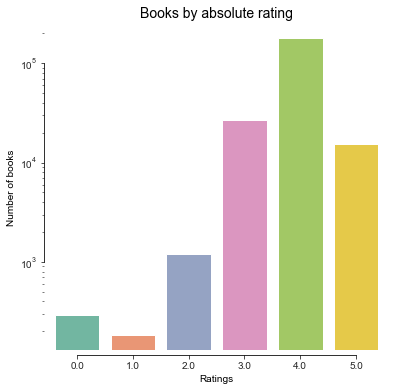

In [105]:
f, ax = plt.subplots(figsize=(6, 6))
_ = sns.set_style("white")
ax = sns.barplot(x=df_books_col_eng_copy.groupby('rating_abs').count().index, 
                 y=df_books_col_eng_copy.groupby('rating_abs').count().book_id, 
                 palette='Set2')
ax.set_yscale('log')
_ = plt.xlabel('Ratings', fontsize=10)
_ = plt.ylabel('Number of books', fontsize=10)
_ = plt.title('Books by absolute rating', fontsize=14)
_ = sns.despine(offset=5, trim=True)

We take samples to manage similar number of books according to `rating_abs`. As we can note, almost all the scores are between 3 and 5. Therefore, we work with maximum 500 of every category:

In [42]:
sample_1 = df_books_col_eng_copy[df_books_col_eng_copy['rating_abs'] == 1]
sample_2 = df_books_col_eng_copy[df_books_col_eng_copy['rating_abs'] == 2]
sample_4 = df_books_col_eng_copy[df_books_col_eng_copy['rating_abs'] == 4]
sample_5 = df_books_col_eng_copy[df_books_col_eng_copy['rating_abs'] == 5]

In [43]:
df_1 = sample_1
df_2 = sample_2.sample(n=500, random_state=0)
df_4 = sample_4.sample(n=500, random_state=0)
df_5 = sample_5.sample(n=500, random_state=0)
df_books_sample_concat = pd.concat([df_1, df_2, df_4, df_5], axis=0, sort=False)

In [44]:
df_books_sample_concat.title.replace(np.nan, '', regex=True, inplace=True)
df_books_sample_concat['title_normalized'] = df_books_sample_concat.title.apply(pre_processing)
df_books_sample_concat['description_PoS'] = df_books_sample_concat.description.apply(part_of_speech_filtering)
df_books_sample_concat['title_description_norm'] = df_books_sample_concat.title_normalized + ' ' + df_books_sample_concat.description_PoS

In [45]:
df_books_sample_concat.head(2)

,book_id,title,language_code,description,similar_books,average_rating,ratings_count,num_pages,text_reviews_count,rating_abs,title_normalized,description_PoS,title_description_norm
901,16137127,Certainty and the Search for Absolute Truth,eng,Wait! Before you fly into that building...\nWh...,[],1.0,1.0,162.0,1.0,1.0,certainty search absolute truth,wait fly building truth knowable certain anyth...,certainty search absolute truth wait fly build...
6925,14740987,A State of Symmetry,eng,"Novel first published in South Africa in 1996,...",[],1.0,2.0,380.0,2.0,1.0,state symmetry,novel south africa 1996 south africa time apar...,state symmetry novel south africa 1996 south a...


Then, we get the similarity matrix, with the coefficients of similarity between movies and all the possible genres:

In [46]:
df_matrix_similarity = matrix_similarity(df_books_sample_concat, tfidf_matrix)

In [47]:
df_matrix_similarity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 901 to 234247
Data columns (total 23 columns):
id                    1684 non-null int64
title                 1684 non-null object
language_code         1684 non-null object
description           1684 non-null object
similar_books         1684 non-null object
ratings_count         1684 non-null float64
num_pages             1684 non-null float64
text_reviews_count    1684 non-null float64
average_rating        1684 non-null float64
Action                1684 non-null float64
Adventure             1684 non-null float64
Crime                 1684 non-null float64
Documentary           1684 non-null float64
Drama                 1684 non-null float64
Family                1684 non-null float64
Fantasy               1684 non-null float64
History               1684 non-null float64
Horror                1684 non-null float64
Music                 1684 non-null float64
Mystery               1684 non-null float64
Romance        

In [48]:
df_matrix_similarity_copy = df_matrix_similarity.copy()

The next step consist on identify the highest coefficients for every movie and assign a 1 if they are between 4 biggest or 0 otherwise.

In [50]:
import sys

for idx in df_matrix_similarity_copy.index:
    
    books_similarities = df_matrix_similarity_copy.loc[idx, 'Action' : 'War']
    tuples_largest = nlargest(4, enumerate(books_similarities), key=lambda x: x[1])
    for ind, _ in tuples_largest:
        df_matrix_similarity_copy[label_genres[ind]][idx] = 1    

/Users/daniela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
#s = df_matrix_similarity_copy.loc[:, 'Action' : 'War']
s = df_matrix_similarity_copy.loc[:, 'Action' : 'War'].where(df_matrix_similarity_copy.loc[:, 'Action' : 'War'] == 1, 0)

In [52]:
s.rename({'Action': 'Action_b',
          'Adventure': 'Adventure_b',
          'Crime': 'Crime_b',
          'Documentary': 'Documentary_b',
          'Drama': 'Drama_b',
          'Family': 'Family_b',
          'Fantasy': 'Fantasy_b',
          'History': 'History_b',
          'Horror': 'Horror_b',
          'Music': 'Music_b',
          'Mystery': 'Mystery_b',
          'Romance': 'Romance_b',
          'Thriller': 'Thriller_b',
          'War':'War_b'}, axis=1, inplace=True)   

In [53]:
df_binary_similarity = pd.concat([df_matrix_similarity_copy, s], axis=1, sort=False)

In [54]:
df_binary_similarity.fillna(0, inplace=True)
df_binary_similarity.head(2)

,id,title,language_code,description,similar_books,ratings_count,num_pages,text_reviews_count,average_rating,Action,...,Drama_b,Family_b,Fantasy_b,History_b,Horror_b,Music_b,Mystery_b,Romance_b,Thriller_b,War_b
901,16137127,Certainty and the Search for Absolute Truth,eng,Wait! Before you fly into that building...\nWh...,[],1.0,162.0,1.0,1.0,0.108026,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6925,14740987,A State of Symmetry,eng,"Novel first published in South Africa in 1996,...",[],2.0,380.0,2.0,1.0,0.120953,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [155]:
#df_binary_similarity.to_csv('../Data/processed/books/classification_genres_books.csv')

In [56]:
df_classification = df_binary_similarity.loc[:, ['ratings_count', 'num_pages', 'text_reviews_count', 
               'Action_b', 'Adventure_b', 'Crime_b', 'Documentary_b',
               'Drama_b', 'Family_b', 'Fantasy_b', 'History_b', 'Horror_b',
               'Music_b', 'Mystery_b', 'Romance_b', 'Thriller_b', 'War_b']]

Applying MinMaxScaler for scaling `ratings_count`, `num_pages` and `text_reviews_count` between (0, 1):

In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df_classification_rescaled = scaler.fit_transform(df_classification)
# summarize transformed data
np.set_printoptions(precision=3)

In [58]:
df_classification_rescaled

array([[5.054e-05, 1.536e-01, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.011e-04, 3.602e-01, 4.464e-04, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [5.054e-05, 2.796e-01, 0.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [5.559e-04, 3.412e-02, 2.679e-03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.011e-04, 2.199e-01, 4.464e-04, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [5.054e-05, 5.782e-02, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [59]:
y_classification = np.round(df_matrix_similarity.average_rating)
y_classification = y_classification[y_classification != 3]

In [60]:
y_classification.unique()

array([1., 2., 4., 5.])

To resolve the classification problem, we define three categories: 
1. Scores 5 and 4 are labeled as 1
2. Scores 2 and 1 are labeled as -1

In [83]:
y_binary_class = []

for y in y_classification:
    if y > 3:
        n = 1
    else:
        n = -1
    y_binary_class.append(n)

Saving the classification data: 

In [63]:
#pd.concat(df_classification, y_classification).to_csv('../Data/processed/books/classification_books.csv')

Splitting data in training and testing:

In [88]:
from sklearn.model_selection import train_test_split

x = df_classification_rescaled
y = y_binary_class    
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### Determine best features

A statistic chi-squared test provided by SelectKBest was applied to extract the features more strongly related to the label or output variable of the features vector. Tests measure dependence between the features and output variable and lower scores represent independence and then useless for the classification.

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract best features
bestfeatures = SelectKBest(score_func=chi2, k=17)
fit = bestfeatures.fit(x, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_classification.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores],axis=1)

featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(17,'Score'))  #print all best features

              Features      Score
1            num_pages  12.737878
0        ratings_count   9.269749
2   text_reviews_count   6.493101
10           History_b   3.450347
14           Romance_b   3.363795
12             Music_b   3.057573
9            Fantasy_b   2.414604
8             Family_b   2.401954
6        Documentary_b   2.151978
3             Action_b   2.092209
4          Adventure_b   1.907704
7              Drama_b   1.671438
11            Horror_b   1.008529
13           Mystery_b   0.478487
16               War_b   0.343136
15          Thriller_b   0.131516
5              Crime_b   0.124222


The genres less related to the rating of books are `Crime`, `War`, `Mystery` and `Thriller`. 

In [66]:
df_binary_similarity.fillna(0, inplace=True)
df_binary_similarity.head(2)

,id,title,language_code,description,similar_books,ratings_count,num_pages,text_reviews_count,average_rating,Action,...,Drama_b,Family_b,Fantasy_b,History_b,Horror_b,Music_b,Mystery_b,Romance_b,Thriller_b,War_b
901,16137127,Certainty and the Search for Absolute Truth,eng,Wait! Before you fly into that building...\nWh...,[],1.0,162.0,1.0,1.0,0.108026,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6925,14740987,A State of Symmetry,eng,"Novel first published in South Africa in 1996,...",[],2.0,380.0,2.0,1.0,0.120953,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [67]:
df_classification_best_features = df_binary_similarity.loc[:, ['ratings_count', 
                                                               'num_pages', 'text_reviews_count', 
                                                               'Action_b', 'Adventure_b', 'Documentary_b',
                                                               'Drama_b', 'Family_b', 'Fantasy_b', 'History_b',
                                                               'Music_b', 'Romance_b', 'Horror_b']]


df_classification_rescaled_best_features = scaler.fit_transform(df_classification_best_features)
# summarize transformed data
np.set_printoptions(precision=3)

In [144]:
x = df_classification_best_features  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [145]:
# Original source 
# (https://scikit-learn.org/stable/modules/ensemble.html) 
# we can build the following ROC curve:

np.random.seed(10)

n_estimator = 5

# It is important to train the ensemble of trees on a different subset
# of the training data than the linear regression model to avoid
# overfitting, in particular if the total number of leaves is
# similar to the number of training samples
X_train, X_train_lr, y_train, y_train_lr = train_test_split(
    X_train, y_train, test_size=0.5, random_state=42)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder(categories='auto')
rf_lm = LogisticRegression(solver='lbfgs', max_iter=500)
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

# Supervised transformation based on gradient boosted trees
grd = GradientBoostingClassifier(n_estimators=5)
grd_enc = OneHotEncoder(categories='auto')
grd_lm = LogisticRegression(solver='lbfgs', max_iter=500)
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)

y_pred_grd_lm = grd_lm.predict_proba(
    grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)

# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)

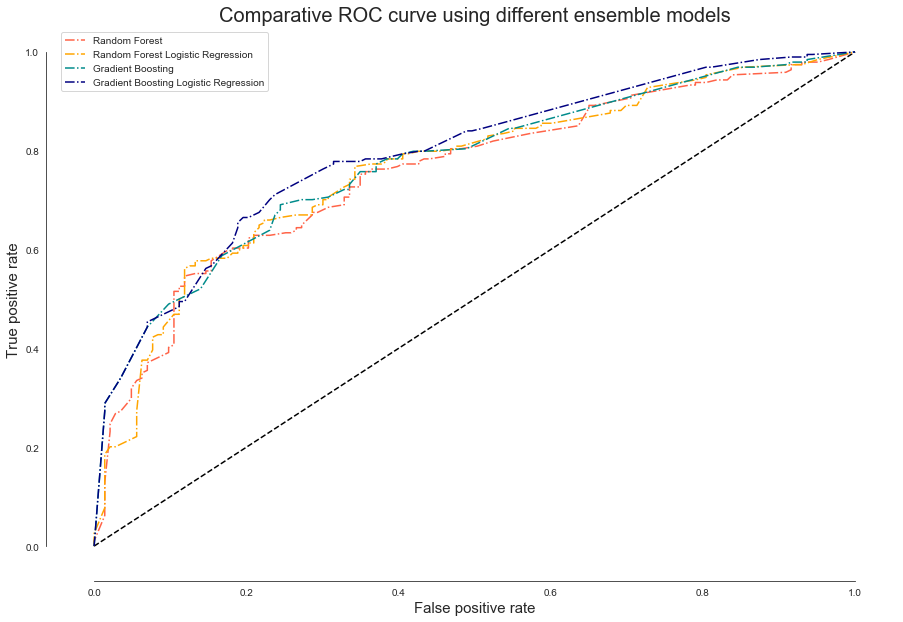

In [146]:
f, ax = plt.subplots(figsize=(15, 10))
_ = plt.plot([0, 1], [0, 1], 'k--')
_ = plt.plot(fpr_rf, tpr_rf, label='Random Forest', color='tomato', linestyle='-.')
_ = plt.plot(fpr_rf_lm, tpr_rf_lm, label='Random Forest Logistic Regression', color='orange', linestyle='-.')
_ = plt.plot(fpr_grd, tpr_grd, label='Gradient Boosting', color='darkcyan', linestyle='-.')
_ = plt.plot(fpr_grd_lm, tpr_grd_lm, label='Gradient Boosting Logistic Regression', color='navy', linestyle='-.')
_ = plt.xlabel('False positive rate', fontsize=15)
_ = plt.ylabel('True positive rate', fontsize=15)
_ = plt.title('Comparative ROC curve using different ensemble models', fontsize=20)
_ = plt.legend(loc='best')
_ = sns.despine(offset=10, trim=True)
plt.show()

In [147]:
print('AUC Random Forest : {}'.format(roc_auc_score(y_test, y_pred_rf)))

AUC Random Forest : 0.7558755677312378


In [148]:
print('AUC Random Forest Logistic Regression : {}'.format(roc_auc_score(y_test, y_pred_rf_lm)))

AUC Random Forest Logistic Regression : 0.763265085430034


In [149]:
print('AUC Gradient Boosting : {}'.format(roc_auc_score(y_test, y_pred_grd)))

AUC Gradient Boosting : 0.774169129839233


In [150]:
print('AUC Gradient Boosting Logistic Regression : {}'.format(roc_auc_score(y_test, y_pred_grd_lm)))

AUC Gradient Boosting Logistic Regression : 0.7919400187441425


In [151]:
predictions = [round(value) for value in y_pred_rf_lm]
predictions = [-1 if p ==0 else 1 for p in predictions]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy Logistic Regression Random Forest: %.2f%%" % (accuracy * 100.0))
confusion_matrix(y_test, predictions)


Accuracy Logistic Regression Random Forest: 70.92%


array([[ 95,  48],
       [ 50, 144]])

In [152]:
predictions = [round(value) for value in y_pred_rf]
predictions = [-1 if p ==0 else 1 for p in predictions]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy Random Forest: %.2f%%" % (accuracy * 100.0))
confusion_matrix(y_test, predictions)


Accuracy Random Forest: 68.84%


array([[ 82,  61],
       [ 44, 150]])

In [153]:
predictions = [round(value) for value in y_pred_grd]
predictions = [-1 if p ==0 else 1 for p in predictions]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy Gradient Boosting: %.2f%%" % (accuracy * 100.0))
confusion_matrix(y_test, predictions)


Accuracy Gradient Boosting: 70.03%


array([[ 81,  62],
       [ 39, 155]])

In [154]:
predictions = [round(value) for value in y_pred_grd_lm]
predictions = [-1 if p ==0 else 1 for p in predictions]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy Logistic Gradient Boosting: %.2f%%" % (accuracy * 100.0))
confusion_matrix(y_test, predictions)

Accuracy Logistic Gradient Boosting: 73.89%


array([[ 98,  45],
       [ 43, 151]])